In [678]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [679]:
df=pd.read_csv('dataset_filled_missing.csv')
df['Id'] = ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     55 non-null     int64  
 1   age                        55 non-null     int64  
 2   afftype                    55 non-null     int64  
 3   melanch                    55 non-null     int64  
 4   edu                        55 non-null     int64  
 5   marriage                   55 non-null     int64  
 6   work                       55 non-null     int64  
 7   madrs1                     55 non-null     int64  
 8   5days_sleep_time_activity  55 non-null     float64
 9   5days_day_time_activity    55 non-null     float64
 10  Id                         55 non-null     object 
dtypes: float64(2), int64(8), object(1)
memory usage: 4.9+ KB


In [681]:
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.feature_selection import RFE # recursive feature elimination

In [682]:
df.columns

Index(['gender', 'age', 'afftype', 'melanch', 'edu', 'marriage', 'work',
       'madrs1', '5days_sleep_time_activity', '5days_day_time_activity', 'Id'],
      dtype='object')

In [683]:
cols=['gender', 'age', 'afftype', 'melanch', 'edu', 'marriage',
       'work', 'madrs1', '5days_sleep_time_activity',
       '5days_day_time_activity']
X=df[cols]
y=df['Id']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)


#estimator = RandomForestClassifier(n_estimators=100)
estimator = GradientBoostingClassifier(n_estimators=100)

selector = RFE(estimator, n_features_to_select=3, step=1) # select 3 features
selector = selector.fit(X_train, y_train)

In [684]:
selector.support_ 

array([False, False, False, False, False, False, False,  True,  True,
        True])

In [685]:
selector.ranking_

array([8, 7, 6, 5, 4, 3, 2, 1, 1, 1])

In [686]:
selector.n_features_

3

In [687]:
np.array(cols)[selector.support_] # convert list to numpy array and use boolean array to filter data 

array(['madrs1', '5days_sleep_time_activity', '5days_day_time_activity'],
      dtype='<U25')

In [688]:
sel_cols=np.array(cols)[selector.support_]
sel_cols

array(['madrs1', '5days_sleep_time_activity', '5days_day_time_activity'],
      dtype='<U25')

In [689]:
selector.transform(X_test)[:5] # return only selected features

array([[2.400000e+01, 4.321100e+04, 3.177260e+05],
       [1.900000e+01, 1.069360e+04, 2.288240e+05],
       [4.000000e+00, 2.348100e+04, 2.556764e+05],
       [9.000000e+00, 6.250400e+04, 4.807282e+05],
       [4.000000e+00, 4.990480e+04, 3.987230e+05]])

In [690]:
X_train_sel=pd.DataFrame(selector.transform(X_train), columns=np.array(cols)[selector.support_])
X_test_sel=pd.DataFrame(selector.transform(X_test), columns=np.array(cols)[selector.support_])

In [691]:
X_train_sel.head()

,madrs1,5days_sleep_time_activity,5days_day_time_activity
0,4.0,37543.8,233625.8
1,4.0,124525.0,467588.6
2,4.0,129507.8,260240.4
3,4.0,79226.0,233218.6
4,28.0,42878.0,72237.4


In [692]:
X_test_sel.head()

,madrs1,5days_sleep_time_activity,5days_day_time_activity
0,24.0,43211.0,317726.0
1,19.0,10693.6,228824.0
2,4.0,23481.0,255676.4
3,9.0,62504.0,480728.2
4,4.0,49904.8,398723.0


In [693]:
#select feature
# model= GradientBoostingClassifier(n_estimators=100, random_state=777)
model= RandomForestClassifier(n_estimators=100, random_state=777)

model.fit(X_train_sel, y_train)
score=model.score(X_test_sel, y_test)
# model_scores.append([score, a[1]])
y_pred=model.predict(X_test_sel)
print(f'feature importances', model.feature_importances_)
print(f'X[selected features] score: {score:.04f}')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

feature importances [0.56057296 0.24801459 0.19141245]
X[selected features] score: 1.0000
[[6 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [694]:
fs=pd.Series(model.feature_importances_, index=X_train_sel.columns).sort_values(ascending=True)
fs

5days_day_time_activity      0.191412
5days_sleep_time_activity    0.248015
madrs1                       0.560573
dtype: float64

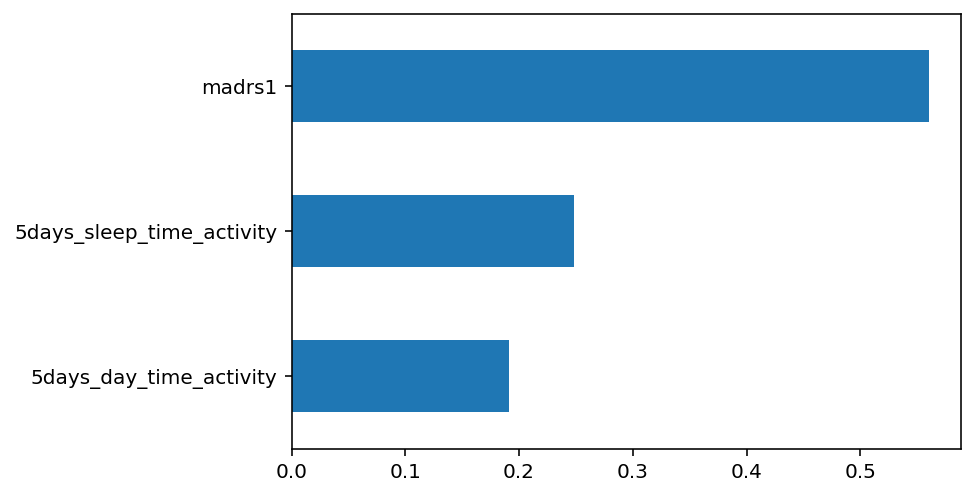

In [695]:
fs.plot(kind='barh');